# The African Writers Series

### The African Writers Series was the landmark imprint for African literature in English in the 20th century. The series was founded in 1962 under the leadership of Alan Hill and James Currey with Chinua Achebe as its first advisory editor. 
### The AWS published a wide range of genres (novels, theater, poetry, folklore, biography) from writers across the continent. The output of the series faltered due to financial troubles in the late 1980s, but it continues today in a different form. 
### The AWS was the an important gateway for the consecration of African writers. Every African Nobel laureate in literature except J.M. Coetzee is an AWS author. Wole Soyinka, Doris Lessing, Naguib Mahfouz, even Mandela. 
### Canons are always controversial, but the AWS is as close as there is to a ‘canon’ of modern anglophone African literature. Beginning with the publication of Things Fall Apart, the AWS published most of what became the canon of modern African literature in the next two and a half decades. It was also influential even outside of anglophone writing as one of the most visible points of entry for authors working in another language to become known to English-reading publics -- Mariama Bâ, Pepetela, Ousmane Sembène, and so on found a larger audience through translations into the AWS series.
### In this notebook, we're asking a series of questions about the AWS and seeing what it is possible to learn via text mining approaches. We'll be using the Literary Language Tool Kit, developed by Ryan Heuser.

<center><img src="aws_1960.jpg" /></center>
<center><img src="aws covers1970.jpg" /></center>
<center><img src="aws covers1980.jpg" /></center>

## First, a quick overview of the corpus. A total of 276 titles were published between the series' founding in 1962 and the departure of its first editors in 1987. The current corpus currently contains 170 titles. I am assembling the rest slowly but surely.

### Here's a snapshot of what the full AWS corpus looks like

### The AWS is closely associated with a 'rise of the African novel'. There's a reason for that

In [1]:
from aws import *

/Users/tobywarner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/tobywarner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/tobywarner/opt/anaconda3/lib/python3.7/site-

In [2]:
df_aws_master = pd.read_excel('/Users/tobywarner/Dropbox/textmining/corpora/aws/metadata_master.xls')

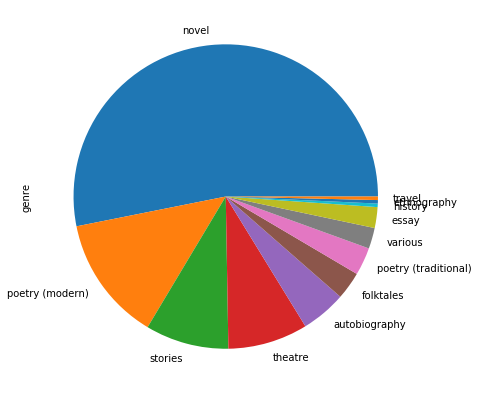

In [3]:
df_aws_master.genre.value_counts().plot(kind='pie', figsize=(7,7))

### It was also heavily male 

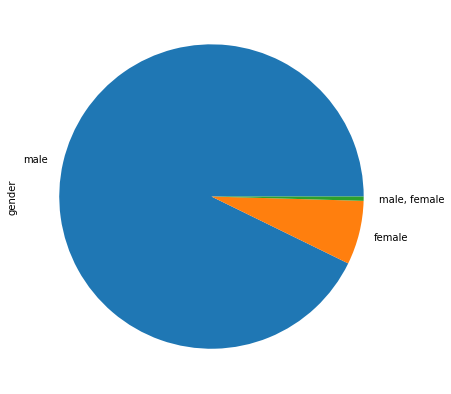

In [4]:
df_aws_master.gender.value_counts().plot(kind='pie', figsize=(7,7))

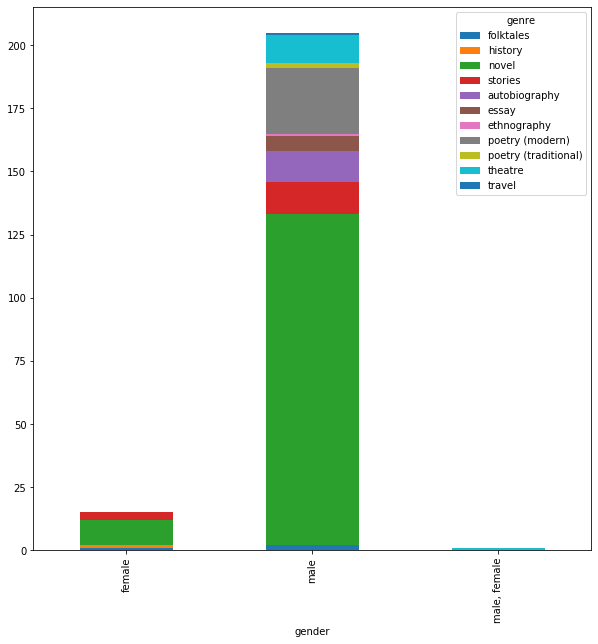

In [5]:
df_aws_master.groupby(['gender', 'genre']).size().unstack().plot(kind='bar', figsize=(10,10), stacked=True)

### The series has a titles from all over the continent. But it also published a lot of Nigerian novelists, which probably reflects Achebe's involvement. 

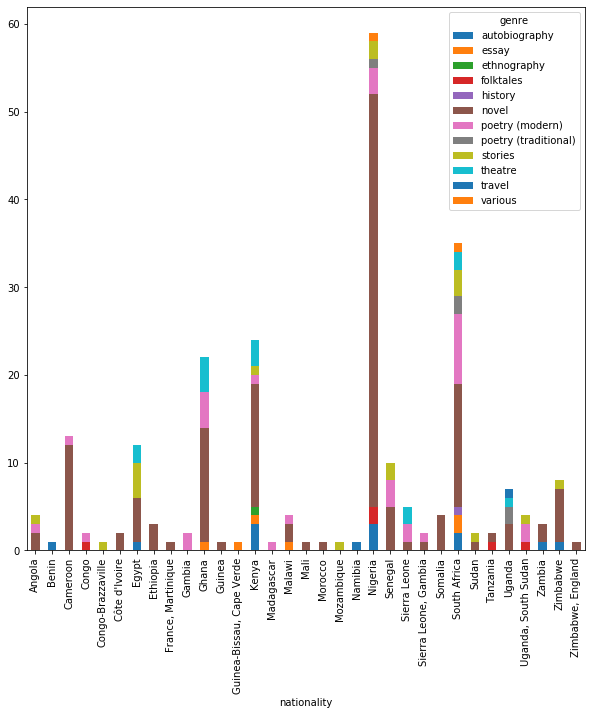

In [6]:
df_aws_master.groupby(['nationality', 'genre']).size().unstack().plot(kind='bar', figsize=(10,10), stacked=True)

### We can see the decline in # of titles published over time here

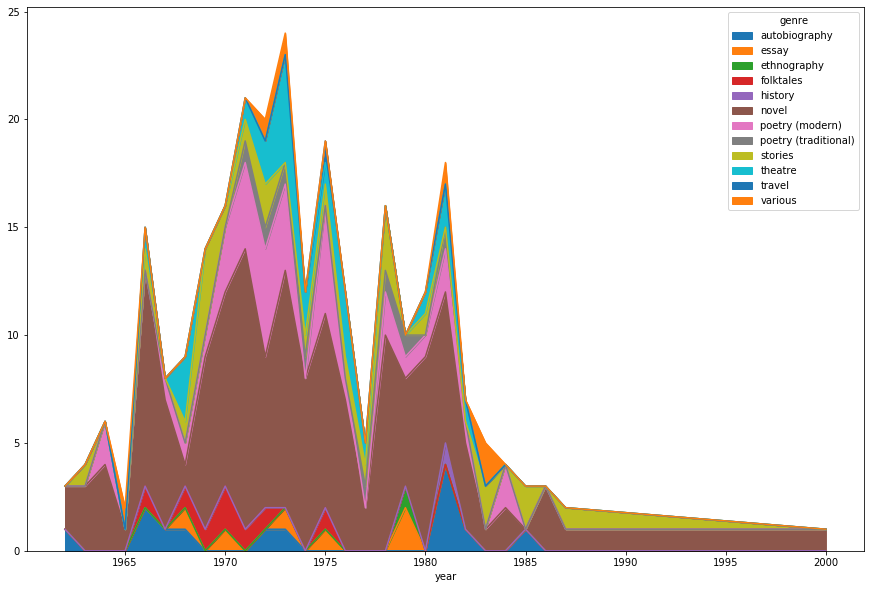

In [7]:
df_aws_master.groupby(['year', 'genre']).size().unstack().plot(kind='area', figsize=(15,10), stacked=True)

# Getting started with LLTK

In [8]:
import lltk

In [9]:
C=get_corpus()

In [10]:
C.meta

,author,title,year,fn,have,number,genre,anthology,originallanguage,translator,editor,gender,nationality,origpubdate,note,path_freqs,path_txt,path_xml,_year_orig,corpus
id,,,,,,,,,,,,,,,,,,,,
AWS010,"Equiano, Olaudah",Equiano's Travels: His Autobiography; The Inte...,1966,AWS010.txt,yes,10,autobio,no,English,,Olaudah Equiano,,Benin,1789.0,,/Users/tobywarner/lltk_data/corpora/aws/freqs/...,/Users/tobywarner/Dropbox/textmining/corpora/a...,/Users/tobywarner/lltk_data/corpora/aws/xml/AW...,1966,AWS
AWS020,"Gatheru, Mugo",Child of Two Worlds.,1966,AWS020.txt,yes,20,autobio,no,English,,,male,Kenya,,,/Users/tobywarner/lltk_data/corpora/aws/freqs/...,/Users/tobywarner/Dropbox/textmining/corpora/a...,/Users/tobywarner/lltk_data/corpora/aws/xml/AW...,1966,AWS
AWS228,"Hussein, Taha",An Egyptian Childhood: the autobiography of Ta...,1981,AWS228.txt,yes,228,autobio,no,Arabic,E. H. Paxton,,male,Egypt,,Translated by E. H. Paxton.,/Users/tobywarner/lltk_data/corpora/aws/freqs/...,/Users/tobywarner/Dropbox/textmining/corpora/a...,/Users/tobywarner/lltk_data/corpora/aws/xml/AW...,1981,AWS
AWS244,"Ya-Otto, John",Battlefront Namibia: an autobiography,1982,AWS244.txt,yes,244,autobio,no,English,,"Ole Gjerstad, Michael Mercer",male,Namibia,,,/Users/tobywarner/lltk_data/corpora/aws/freqs/...,/Users/tobywarner/Dropbox/textmining/corpora/a...,/Users/tobywarner/lltk_data/corpora/aws/xml/AW...,1982,AWS
AWS249,"Obasanjo, Olusegun",My Command: An Account of the Nigerian Civil W...,1981,AWS249.txt,yes,249,autobio,no,English,,,male,Nigeria,,,/Users/tobywarner/lltk_data/corpora/aws/freqs/...,/Users/tobywarner/Dropbox/textmining/corpora/a...,/Users/tobywarner/lltk_data/corpora/aws/xml/AW...,1981,AWS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AWS216,"Yirenkyi, Asiedu",Kivuli and other plays.,1980,AWS216.txt,yes,216,theatre,no,English,,,male,Ghana,,,/Users/tobywarner/lltk_data/corpora/aws/freqs/...,/Users/tobywarner/Dropbox/textmining/corpora/a...,/Users/tobywarner/lltk_data/corpora/aws/xml/AW...,1980,AWS
AWS232,"Johnson-Davies, Denys (ed.)",Egyptian One-act Plays.,1981,AWS232.txt,yes,232,theatre,no,Arabic,Denys Johnson-Davies,Denys Johnson-Davies,,Egypt,,Selected and translated from the Arabic by Den...,/Users/tobywarner/lltk_data/corpora/aws/freqs/...,/Users/tobywarner/Dropbox/textmining/corpora/a...,/Users/tobywarner/lltk_data/corpora/aws/xml/AW...,1981,AWS
AWS264,"De Graft, Joe",Muntu.,1977,AWS264.txt,yes,264,theatre,no,English,,,male,Ghana,,,/Users/tobywarner/lltk_data/corpora/aws/freqs/...,/Users/tobywarner/Dropbox/textmining/corpora/a...,/Users/tobywarner/lltk_data/corpora/aws/xml/AW...,1977,AWS


# Some building blocks...

In [11]:
# Making a DF of the MFW
C.mfw_df(n=1000,excl_stopwords=True)

,count,fpm,rank,ranks_avg,pos,pos0
word,,,,,,
people,19384,2120.317286,1,65,nn1,n
time,18475,2020.886394,2,69,nn1,n
day,11398,1246.769316,4,96,nn1,n
father,10290,1125.570825,5,106,nn1,n
woman,9104,995.840310,6,119,nn1,n
...,...,...,...,...,...,...
dangerous,621,67.928035,996,1319,jj,j
sounded,621,67.928035,997,1320,vvd,v
matters,620,67.818650,998,1322,nn2,n


In [12]:
# Let's make a dtm
dtm_tfidf = C.dtm(tf=True, excl_stopwords=True)
dtm_tfidf

,people,time,day,father,woman,eyes,house,told,own,am,...,salamanders,circumscribed,stent,favorite,reunite,buckled,bloodstream,epilepsy,shuttered,swellings
id,,,,,,,,,,,,,,,,,,,,,
AWS001,0.005542,0.003611,0.003985,0.004919,0.003736,0.001743,0.001806,0.004110,0.003238,0.001681,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
AWS002,0.003372,0.004778,0.003841,0.010398,0.004871,0.007681,0.002248,0.003466,0.002248,0.004871,...,0.0,0.0,0.0,0.0,0.000094,0.000000,0.0,0.0,0.0,0.0
AWS003,0.006132,0.005996,0.004156,0.005110,0.001703,0.002589,0.001567,0.005587,0.001022,0.003407,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
AWS005,0.004204,0.006741,0.002536,0.000868,0.004738,0.006273,0.002536,0.003337,0.003404,0.001602,...,0.0,0.0,0.0,0.0,0.000000,0.000067,0.0,0.0,0.0,0.0
AWS006,0.014226,0.006975,0.002048,0.000166,0.011459,0.014946,0.003211,0.004262,0.000941,0.004428,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AWS261,0.000000,0.008850,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004425,0.004425,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
AWS262,0.003406,0.013479,0.004855,0.000507,0.001160,0.002826,0.002391,0.003189,0.001739,0.005145,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
AWS263,0.013230,0.008938,0.004485,0.003872,0.001678,0.008293,0.004130,0.003872,0.000871,0.008067,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


## What does the corpus look like right now?

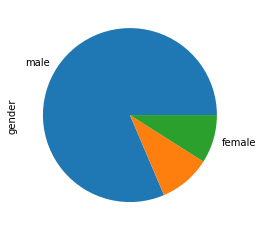

In [13]:
# Breakdown of author gender
C.meta['gender'].value_counts().plot.pie()

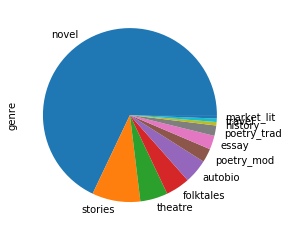

In [14]:
# Breakdown of genre
C.meta['genre'].value_counts().plot.pie()

## Taking a peek at TFIDF for some well known AWS titles

In [15]:
# Obiechina
dtm_tfidf.loc['AWS109'].sort_values(ascending=False).head(25)

love          0.022989
pamphlets     0.015252
pamphlet      0.013042
literature    0.012157
authors       0.011052
popular       0.010831
life          0.009947
market        0.007515
writers       0.007294
money         0.006852
people        0.005526
marriage      0.005084
african       0.005084
hard          0.004642
girls         0.004421
reader        0.004200
economic      0.003758
story         0.003758
english       0.003537
war           0.003316
matter        0.003316
letters       0.003095
printing      0.003095
romantic      0.003095
readers       0.003095
Name: AWS109, dtype: float64

In [16]:
# Bâ
dtm_tfidf.loc['AWS248'].sort_values(ascending=False).head(25)

life        0.007551
children    0.004973
time        0.004973
mother      0.004420
woman       0.004328
love        0.003776
day         0.003499
own         0.003315
school      0.003223
heart       0.003131
women       0.003039
daughter    0.002947
house       0.002947
eyes        0.002947
wife        0.002947
marriage    0.002855
am          0.002855
hand        0.002763
child       0.002671
people      0.002486
family      0.002394
look        0.002302
white       0.002210
husband     0.002118
towards     0.002026
Name: AWS248, dtype: float64

In [17]:
# Bessie Head, Collector of Treasures
dtm_tfidf.loc['AWS182'].sort_values(ascending=False).head(25)

people      0.013372
life        0.010573
village     0.009827
day         0.007526
time        0.007277
woman       0.007028
women       0.006966
own         0.006779
yard        0.006717
children    0.006220
wife        0.005784
home        0.004416
little      0.004354
head        0.004105
prophet     0.004043
looked      0.003421
water       0.003296
am          0.003234
husband     0.003234
money       0.003172
walked      0.003172
hut         0.003172
child       0.003110
god         0.003110
left        0.002923
Name: AWS182, dtype: float64

In [18]:
# Bessie Head, Rain Clouds Gather
dtm_tfidf.loc['AWS247'].sort_values(ascending=False).head(25)

people     0.008412
life       0.007114
cattle     0.006756
time       0.006353
women      0.006353
chief      0.006085
village    0.006040
looked     0.005638
woman      0.005101
own        0.004653
little     0.004609
walked     0.004295
day        0.004251
country    0.003714
eyes       0.003490
mind       0.003400
stood      0.003400
brother    0.003266
world      0.003132
child      0.003087
home       0.002998
kept       0.002998
hut        0.002908
black      0.002774
farm       0.002774
Name: AWS247, dtype: float64

In [19]:
# Ouologuem
dtm_tfidf.loc['AWS099'].sort_values(ascending=False).head(25)

eyes            0.005220
time            0.003893
white           0.003848
day             0.003848
head            0.003848
black           0.003494
little          0.003185
life            0.003008
body            0.002919
suddenly        0.002919
people          0.002831
god             0.002743
woman           0.002610
notables        0.002477
night           0.002433
bishop          0.002344
lips            0.002344
water           0.002212
women           0.002079
love            0.002079
magnificence    0.002079
blood           0.002035
hand            0.002035
french          0.002035
royal           0.001902
Name: AWS099, dtype: float64

In [20]:
# Salih
dtm_tfidf.loc['AWS066'].sort_values(ascending=False).head(25)

wad            0.007280
time           0.007145
people         0.006471
life           0.005325
village        0.005190
eyes           0.004786
woman          0.004651
god            0.004584
grandfather    0.004516
night          0.004314
house          0.003910
women          0.003775
left           0.003775
heard          0.003775
father         0.003640
found          0.003640
voice          0.003505
day            0.003438
told           0.003438
head           0.003236
love           0.003033
world          0.002966
water          0.002831
am             0.002831
suddenly       0.002764
Name: AWS066, dtype: float64

In [21]:
# Oyono, Houseboy
dtm_tfidf.loc['AWS029'].sort_values(ascending=False).head(25)

madame        0.016008
commandant    0.012089
white         0.009088
eyes          0.007671
father        0.007587
time          0.006086
gullet        0.006003
wife          0.005753
little        0.005503
told          0.005419
hand          0.005086
towards       0.004919
head          0.004836
door          0.004752
cook          0.004586
called        0.004502
looked        0.003919
whites        0.003835
look          0.003752
residence     0.003752
women         0.003669
mouth         0.003418
round         0.003335
night         0.003252
brought       0.003252
Name: AWS029, dtype: float64

In [22]:
# Achebe, TFA
dtm_tfidf.loc['AWS001'].sort_values(ascending=False).head(25)

clan        0.006725
mother      0.006600
children    0.006476
people      0.005542
father      0.004919
village     0.004795
women       0.004732
white       0.004608
called      0.004359
wife        0.004234
brought     0.004172
told        0.004110
earth       0.004047
hut         0.004047
day         0.003985
night       0.003923
woman       0.003736
sat         0.003674
time        0.003611
yams        0.003549
compound    0.003549
heard       0.003549
soon        0.003362
stood       0.003362
god         0.003238
Name: AWS001, dtype: float64

# Trying to do this by gender and novel

In [23]:
# Group tfidf into MDW
C.mdw(
    'gender',
    texts=C.meta.query('genre=="novel"'),
    agg='median',
    n=2000,
    pos_only={'n*'}
)

U    pvalue is_signif  \
distinctive_of group1 group2 word                                   
female         female male   cook       342.0  0.048224      True   
                             shillings  342.0  0.044022      True   
                             lack       341.5  0.049500      True   
                             reply      341.5  0.049532      True   
                             learn      341.0  0.049640      True   
...                                       ...       ...       ...   
NaN            female male   moved        NaN       NaN       NaN   
                             had          NaN       NaN       NaN   
                             how          NaN       NaN       NaN   
                             few          NaN       NaN       NaN   
                             put          NaN       NaN       NaN   

                                        group1_mean  group2_mean  U_z  \
distinctive_of group1 group2 word                                       
female         female male   cook          0.000024     0.000013  NaN   
                             shillings     0.000037     0.000021  NaN   
                             lack          0.000009     0.000007  NaN   
                             reply         0.000012     0.000010  NaN   
                             learn         0.000002     0.000002  NaN   
...                                             ...          ...  ...   
NaN            female male   moved              NaN          NaN  NaN   
                             had                NaN          NaN  NaN   
                             how                NaN          NaN  NaN   
                             few                NaN          NaN  NaN   
                             put                NaN          NaN  NaN   

                                             method  
distinctive_of group1 group2 word                    
female         female male   cook       mannwhitney  
                             shillings  mannwhitney  
                             lack       mannwhitney  
                             reply      mannwhitney  
                             learn      mannwhitney  
...                                             ...  
NaN            female male   moved      mannwhitney  
                             had        mannwhitney  
                             how        mannwhitney  
                             few        mannwhitney  
                             put        mannwhitney  

[1818 rows x 7 columns]

## How do the most frequent words change over time?

### Let's just look at novels and nouns

In [24]:
# set texts
novel_texts = C.meta.query('genre=="novel"')

# create dataframe
top_noun_by_period = C.mfw_df(
    texts=novel_texts,               # specify texts (otherwise all)
    # how words work
    only_pos = {'n*'},       # only part(s) of speech (Penn Treebank, n*)
    n=20,                            # Specify number of top words
    by_ntext=False,                    # Count number of documents not number of words
    by_fpm=True,                       # Count by within-text relative sums
    min_count=None,                    # Minimum count of word
    excl_stopwords=False,              # Exclude stopwords (set in config.txt)
    excl_top=200,                      # Exclude words ranked 1:`not_top`
    
    # how periods work
    yearbin=5,                        # Average relative counts across `yearbin` periods
    col_group='period',                # Which column to store `yearbin` period on
    n_by_period=None,                  # Number of top words per period
    keep_periods=True,                 # Keep periods in output dataframe
    n_agg='median',                    # How to aggregate across periods
    min_periods=None,                  # minimum number of periods a word must appear in
    valtype='fpm',                     # valtype to compute top words by
    #**attrs
)
top_noun_by_period

,period,word,count,fpm,rank,pos,pos0
0,1960-1965,thing,4595,576.782201,217,nn1,n
1,1965-1970,thing,12742,580.878723,206,nn1,n
2,1975-1980,thing,12547,525.099984,211,nn1,n
3,1980-1985,thing,7522,581.547592,200,nn1,n
4,1960-1965,years,4544,570.380483,220,nn2,n
...,...,...,...,...,...,...,...
99,1985-1990,death,957,480.274133,284,nn1,n
100,1965-1970,work,10807,492.666486,234,nn1,n
101,1975-1980,work,13342,558.371243,200,nn1,n
102,1980-1985,work,7097,548.689612,206,nn1,n


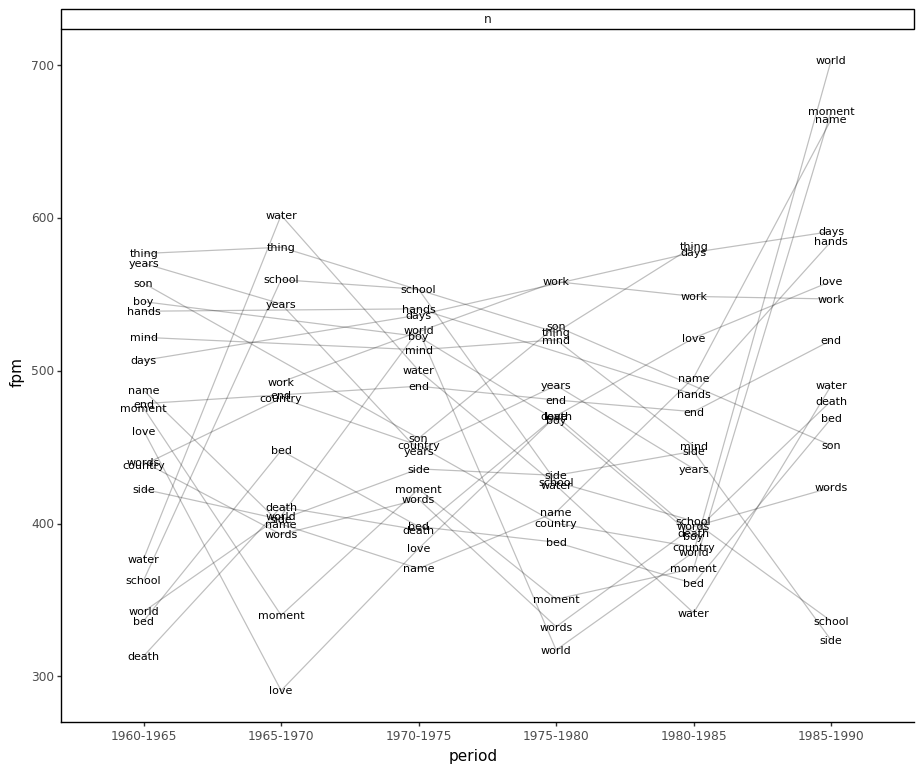

<ggplot: (8770501591737)>

In [25]:
# Simple plot
import plotnine as p9
p9.options.figure_size=(11,9)
p9.ggplot(
    p9.aes(x='period',y='fpm',label='word',group='word'),
    data=top_noun_by_period
) + p9.facet_wrap('pos0') + p9.geom_line(alpha=0.25) + p9.geom_text(size=8) + p9.theme_classic()

### Lets try it with novels and verbs now...

In [26]:
# set texts
novel_texts2 = C.meta.query('genre=="novel"')

# create dataframe
top_verb_by_period = C.mfw_df(
    texts=novel_texts,               # specify texts (otherwise all)
    # how words work
    only_pos = {'v*'},       # only part(s) of speech (Penn Treebank, n*)
    n=20,                            # Specify number of top words
    by_ntext=False,                    # Count number of documents not number of words
    by_fpm=True,                       # Count by within-text relative sums
    min_count=None,                    # Minimum count of word
    excl_stopwords=False,              # Exclude stopwords (set in config.txt)
    excl_top=200,                      # Exclude words ranked 1:`not_top`
    
    # how periods work
    yearbin=5,                        # Average relative counts across `yearbin` periods
    col_group='period',                # Which column to store `yearbin` period on
    n_by_period=None,                  # Number of top words per period
    keep_periods=True,                 # Keep periods in output dataframe
    n_agg='median',                    # How to aggregate across periods
    min_periods=None,                  # minimum number of periods a word must appear in
    valtype='fpm',                     # valtype to compute top words by
    #**attrs
)
top_verb_by_period

,period,word,count,fpm,rank,pos,pos0
0,1960-1965,found,5061,635.276326,203,vvd,v
1,1965-1970,found,11951,544.818837,216,vvd,v
2,1970-1975,found,15076,409.168645,256,vvd,v
3,1975-1980,found,12536,524.639627,212,vvd,v
4,1980-1985,found,5476,423.365410,251,vvd,v
...,...,...,...,...,...,...,...
106,1985-1990,ask,371,186.187778,603,vv0,v
107,1965-1970,sat,13118,598.019706,201,vvd,v
108,1975-1980,sat,10940,457.846005,245,vvd,v
109,1980-1985,sat,5294,409.294463,260,vvd,v


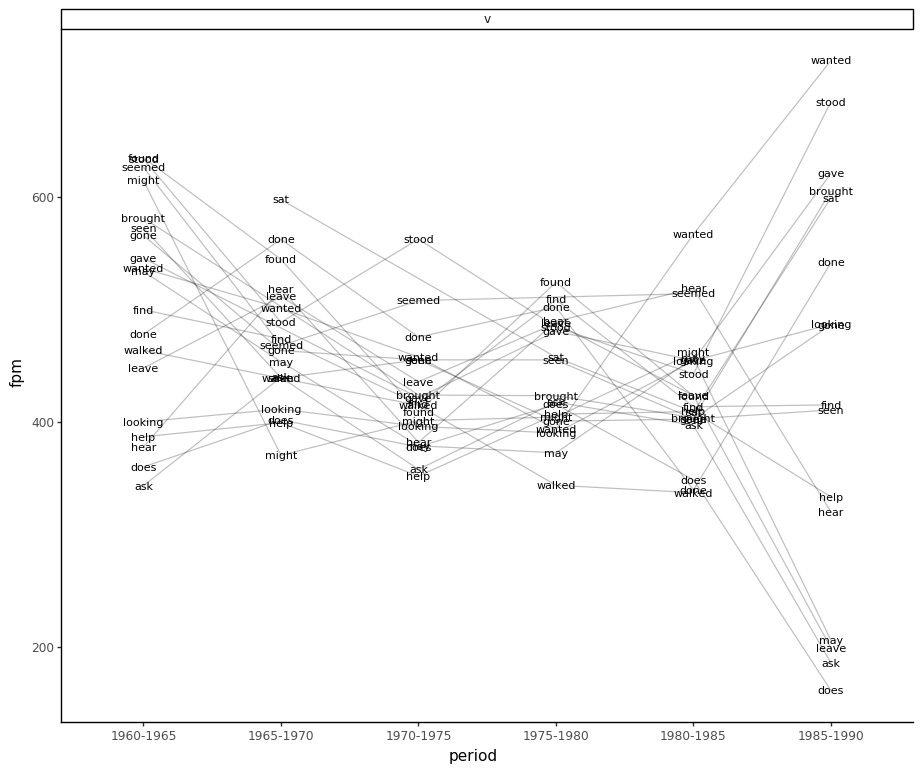

<ggplot: (8770497291237)>

In [27]:
# Simple plot
import plotnine as p9
p9.options.figure_size=(11,9)
p9.ggplot(
    p9.aes(x='period',y='fpm',label='word',group='word'),
    data=top_verb_by_period
) + p9.facet_wrap('pos0') + p9.geom_line(alpha=0.25) + p9.geom_text(size=8) + p9.theme_classic()

## Let's try this with gender and novels

In [28]:
# set texts
texts_wom = C.meta.query('gender=="female" & genre=="novel"')

# create dataframe
top_noun_by_period_wom = C.mfw_df(
    texts=texts_wom,               # specify texts (otherwise all)
    # how words work
    only_pos = {'n*'},       # only part(s) of speech (Penn Treebank, n*)
    n=20,                            # Specify number of top words
    by_ntext=False,                    # Count number of documents not number of words
    by_fpm=True,                       # Count by within-text relative sums
    min_count=None,                    # Minimum count of word
    excl_stopwords=False,              # Exclude stopwords (set in config.txt)
    excl_top=200,                      # Exclude words ranked 1:`not_top`
    
    # how periods work
    yearbin=5,                        # Average relative counts across `yearbin` periods
    col_group='period',                # Which column to store `yearbin` period on
    n_by_period=None,                  # Number of top words per period
    keep_periods=True,                 # Keep periods in output dataframe
    n_agg='median',                    # How to aggregate across periods
    min_periods=None,                  # minimum number of periods a word must appear in
    valtype='fpm',                     # valtype to compute top words by
    #**attrs
)
top_noun_by_period_wom

,period,word,count,fpm,rank,pos,pos0
0,1965-1970,god,795,796.605958,200,nn1,n
1,1975-1980,god,187,187.282609,586,nn1,n
2,1980-1985,god,1765,590.355893,215,nn1,n
3,1985-1990,god,440,441.760415,279,nn1,n
4,1965-1970,food,758,759.531215,209,nn1,n
...,...,...,...,...,...,...,...
80,1985-1990,days,411,412.644388,300,nn2,n
81,1970-1975,girl,2321,582.439974,234,nn1,n
82,1975-1980,girl,631,631.953618,224,nn1,n
83,1980-1985,girl,1464,489.677636,249,nn1,n


In [29]:
# set texts
texts_men = C.meta.query('gender=="male" & genre=="novel"')

# create dataframe
top_noun_by_period_men = C.mfw_df(
    texts=texts_men,               # specify texts (otherwise all)
    # how words work
    only_pos = {'n*'},       # only part(s) of speech (Penn Treebank, n*)
    n=20,                            # Specify number of top words
    by_ntext=False,                    # Count number of documents not number of words
    by_fpm=True,                       # Count by within-text relative sums
    min_count=None,                    # Minimum count of word
    excl_stopwords=False,              # Exclude stopwords (set in config.txt)
    excl_top=200,                      # Exclude words ranked 1:`not_top`
    
    # how periods work
    yearbin=5,                        # Average relative counts across `yearbin` periods
    col_group='period',                # Which column to store `yearbin` period on
    n_by_period=None,                  # Number of top words per period
    keep_periods=True,                 # Keep periods in output dataframe
    n_agg='median',                    # How to aggregate across periods
    min_periods=None,                  # minimum number of periods a word must appear in
    valtype='fpm',                     # valtype to compute top words by
    #**attrs
)
top_noun_by_period_men

,period,word,count,fpm,rank,pos,pos0
0,1960-1965,years,4544,570.380483,220,nn2,n
1,1965-1970,years,11073,528.853437,221,nn2,n
2,1970-1975,years,13501,451.992192,239,nn2,n
3,1975-1980,years,11328,494.758780,221,nn2,n
4,1980-1985,years,3420,343.900705,311,nn2,n
...,...,...,...,...,...,...,...
105,1985-1990,sir,269,269.918533,469,nn1,n
106,1965-1970,work,10465,499.814975,230,nn1,n
107,1975-1980,work,12659,552.891190,204,nn1,n
108,1980-1985,work,4537,456.221491,242,nn1,n


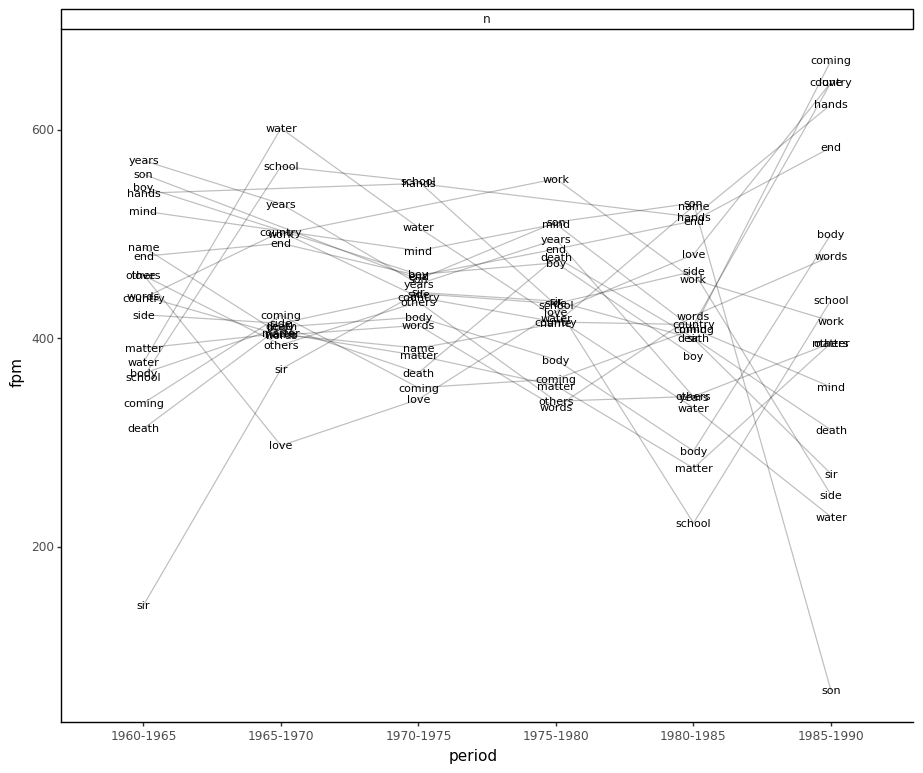

<ggplot: (8770525520421)>

In [30]:
# Simple plot of men
import plotnine as p9
p9.options.figure_size=(11,9)
p9.ggplot(
    p9.aes(x='period',y='fpm',label='word',group='word'),
    data=top_noun_by_period_men
) + p9.facet_wrap('pos0') + p9.geom_line(alpha=0.25) + p9.geom_text(size=8) + p9.theme_classic()

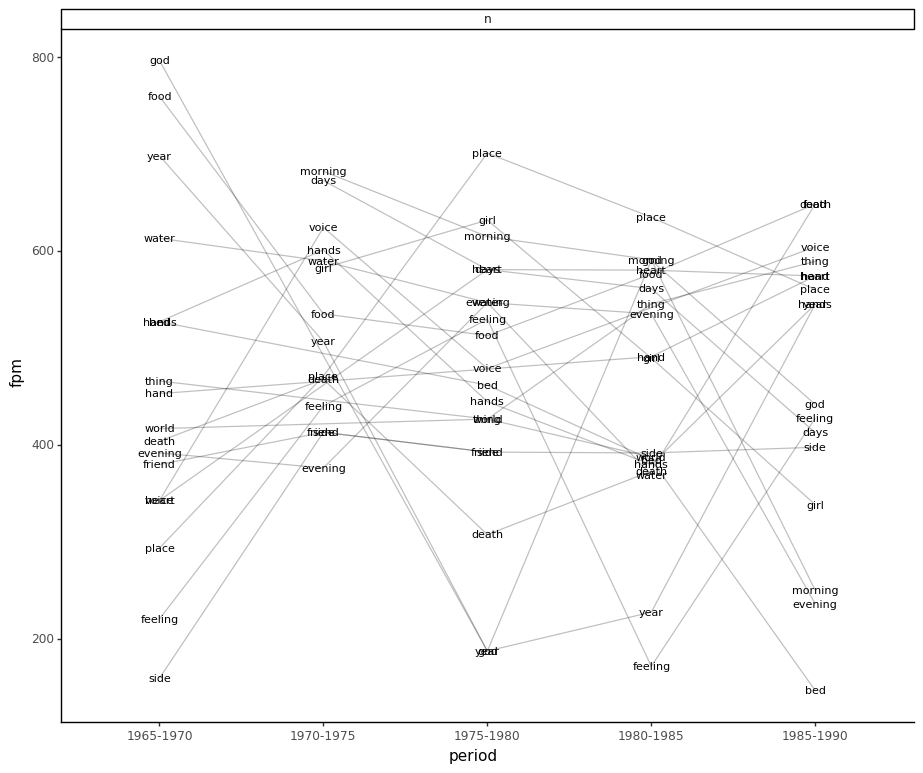

<ggplot: (8770503079873)>

In [31]:
# Simple plot of women
import plotnine as p9
p9.options.figure_size=(11,9)
p9.ggplot(
    p9.aes(x='period',y='fpm',label='word',group='word'),
    data=top_noun_by_period_wom
) + p9.facet_wrap('pos0') + p9.geom_line(alpha=0.25) + p9.geom_text(size=8) + p9.theme_classic()

## And by nationality

In [32]:
# set texts
texts_nigeria = C.meta.query('nationality=="nigeria"')

# create dataframe
top_noun_by_period_nigeria = C.mfw_df(
    texts=texts_nigeria,               # specify texts (otherwise all)
    # how words work
    only_pos = {'n*'},       # only part(s) of speech (Penn Treebank, n*)
    n=20,                            # Specify number of top words
    by_ntext=False,                    # Count number of documents not number of words
    by_fpm=True,                       # Count by within-text relative sums
    min_count=None,                    # Minimum count of word
    excl_stopwords=False,              # Exclude stopwords (set in config.txt)
    excl_top=200,                      # Exclude words ranked 1:`not_top`
    
    # how periods work
    yearbin=5,                        # Average relative counts across `yearbin` periods
    col_group='period',                # Which column to store `yearbin` period on
    n_by_period=None,                  # Number of top words per period
    keep_periods=True,                 # Keep periods in output dataframe
    n_agg='median',                    # How to aggregate across periods
    min_periods=None,                  # minimum number of periods a word must appear in
    valtype='fpm',                     # valtype to compute top words by
    #**attrs
)
top_noun_by_period_nigeria

[AWS] Word freqs already saved


,period,word,count,fpm,rank,pos,pos0
0,1960-1965,voice,5036,632.138229,205,nn1,n
1,1965-1970,voice,17999,547.430709,210,nn1,n
2,1970-1975,voice,27103,555.911366,201,nn1,n
3,1985-1990,voice,1946,651.517926,206,nn1,n
4,1960-1965,morning,4855,609.418408,209,nn1,n
...,...,...,...,...,...,...,...
98,1985-1990,death,1137,380.665921,304,nn1,n
99,1970-1975,room,26972,553.224416,203,nn1,n
100,1975-1980,room,20314,541.413711,207,nn1,n
101,1980-1985,room,13531,549.383713,201,nn1,n


In [33]:
# set texts
texts_not_nigeria = C.meta.query('nationality!="nigeria"')

# create dataframe
top_noun_by_period_not_nigeria = C.mfw_df(
    texts=texts_not_nigeria,               # specify texts (otherwise all)
    # how words work
    only_pos = {'n*'},       # only part(s) of speech (Penn Treebank, n*)
    n=20,                            # Specify number of top words
    by_ntext=False,                    # Count number of documents not number of words
    by_fpm=True,                       # Count by within-text relative sums
    min_count=None,                    # Minimum count of word
    excl_stopwords=False,              # Exclude stopwords (set in config.txt)
    excl_top=200,                      # Exclude words ranked 1:`not_top`
    
    # how periods work
    yearbin=5,                        # Average relative counts across `yearbin` periods
    col_group='period',                # Which column to store `yearbin` period on
    n_by_period=None,                  # Number of top words per period
    keep_periods=True,                 # Keep periods in output dataframe
    n_agg='median',                    # How to aggregate across periods
    min_periods=None,                  # minimum number of periods a word must appear in
    valtype='fpm',                     # valtype to compute top words by
    #**attrs
)
top_noun_by_period_not_nigeria

,period,word,count,fpm,rank,pos,pos0
0,1960-1965,voice,5036,632.138229,205,nn1,n
1,1965-1970,voice,17999,547.430709,210,nn1,n
2,1970-1975,voice,27103,555.911366,201,nn1,n
3,1985-1990,voice,1946,651.517926,206,nn1,n
4,1960-1965,morning,4855,609.418408,209,nn1,n
...,...,...,...,...,...,...,...
98,1985-1990,death,1137,380.665921,304,nn1,n
99,1970-1975,room,26972,553.224416,203,nn1,n
100,1975-1980,room,20314,541.413711,207,nn1,n
101,1980-1985,room,13531,549.383713,201,nn1,n


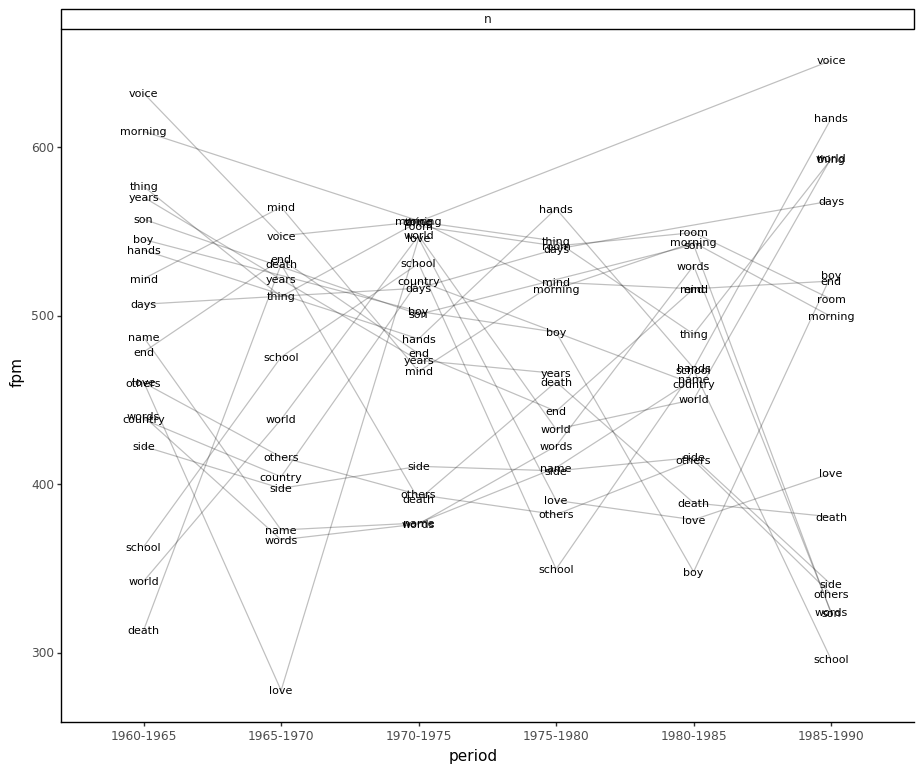

<ggplot: (8770509200381)>

In [34]:
# Simple plot of nigeria
import plotnine as p9
p9.options.figure_size=(11,9)
p9.ggplot(
    p9.aes(x='period',y='fpm',label='word',group='word'),
    data=top_noun_by_period_nigeria
) + p9.facet_wrap('pos0') + p9.geom_line(alpha=0.25) + p9.geom_text(size=8) + p9.theme_classic()

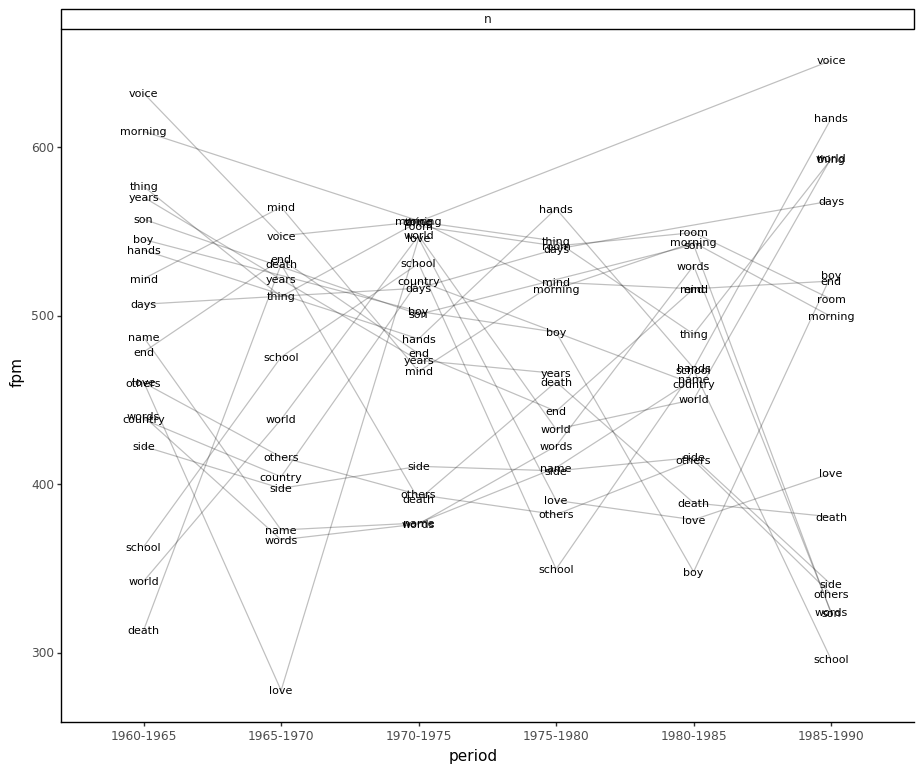

<ggplot: (8770509213645)>

In [35]:
# Simple plot of not nigeria
import plotnine as p9
p9.options.figure_size=(11,9)
p9.ggplot(
    p9.aes(x='period',y='fpm',label='word',group='word'),
    data=top_noun_by_period_not_nigeria
) + p9.facet_wrap('pos0') + p9.geom_line(alpha=0.25) + p9.geom_text(size=8) + p9.theme_classic()

## Let's import some other corpora

In [36]:
# this is TxtLab
C2 = get_corpus2()

In [37]:
C2.meta

""


In [38]:
# this is MarkMark
C3 = get_corpus3()

In [39]:
C3.meta

""


In [40]:
lltk.show()

| name                | desc                                                                                                                                                                      | license                                                                     | metadata                                                                              | freqs                                                                              | txt                                                                           | xml                                                                    | raw                                                                    |
|:--------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:----------------------------------------------------------------------------|:--------------------------------------------------------------------------------------|:-----------------------------------------------------------------------------------|:------------------------------------------------------------------------------|:-----------------------------------------------------------------------|:-----------------------------------------------------------------------|
| ARTFL               | [American and French Research on the Treasury of the French Language](https://artfl-project.uchicago.edu)                                                                 | Academic                                                                    | ☂️                                                                                     | ☂️                                                                                  |                                                                               |                                                                        |                                                                        |
| BPO                 | [British Periodicals Online](https://proquest.libguides.com/britishperiodicals)                                                                                           | Commercial                                                                  | ☂️                                                                                     |                                                                                    |                                                                               |                                                                        | ☂️                                                                      |
| CLMET               | [Corpus of Late Modern English Texts](https://perswww.kuleuven.be/~u0044428/clmet3_0.htm)                                                                                 | [Academic](https://ota.bodleian.ox.ac.uk/repository/xmlui/page/licence-ota) | [🌞](https://www.dropbox.com/s/m1jxj45al7b17cv/clmet_metadata.zip?dl=1)               | [🌞](https://www.dropbox.com/s/lnvwnbzskvqsu9p/clmet_freqs.zip?dl=1)               | ☂️                                                                             | ☂️                                                                      |                                                                        |
| COHA                | [Corpus of Historical American English](https://www.english-corpora.org/coha/)                                                                                            | Commercial                                                                  | ☂️                                                                                     | ☂️                                                                                  | ☂️                                                                             |                                                                        | ☂️                                                                      |
| CanonFiction        | Long history of fiction (Chadwyck, MarkMark, misc.)                                                                                                                       | Mixed                                                                       | [🌞](https://www.dropbox.com/s/1bmvz17pcjpqnab/canon_fiction_metadata.zip?dl=1)       | [🌞](https://www.dropbox.com/s/i5byh4cxmo5x3pr/canon_fiction_freqs.zip?dl=1)       | ☂️                                                                             |                                                                        |                                                                        |
| Chadwyck            | [Chadwyck-Healey Fiction Collections](http://collections.chadwyck.co.uk/marketing/list_of_all.jsp)                                                                        | Mixed                                                                       | [🌞](https://www.dropbox.com/s/byqbi8sik255469/chadwyck_metadata.zip?dl=1)            | [🌞](https://www.dropbox.com/s/syluxyz1mcx5495/chadwyck_freqs.zip?dl=1)            | ☂️                                                                             | ☂️                                                                      | ☂️                                                                      |
| ChadwyckDrama       | [Chadwyck-Healey Drama Collections](http://collections.chadwyck.co.uk/marketing/list_of_all.jsp)                                                                          | Mixed                                                                       | ☂️                                                                                     | ☂️                                                                                  | ☂️                                                                             | ☂️                                                                      | ☂️                                                                      |
| ChadwyckPoetry      | [Chadwyck-Healey Poetry Collections](http://collections.chadwyck.co.uk/marketing/list_of_all.jsp)                                                                         | Mixed                                                                       | ☂️                                                                                     | ☂️                                                                                  | ☂️                                                                             | ☂️                                                                      | ☂️                                                                      |
| Chicago             | [U of Chicago Corpus of C20 Novels](https://textual-optics-lab.uchicago.edu/us_novel_corpus)                                                                              | Academic                                                                    | ✓                                                                                     | ✓                                                                                  | ☂️                                                                             |                                                                        |                                                                        |
| DTA                 | [Deutsches Text Archiv](http://www.deutschestextarchiv.de)                                                                                                                | [Free](https://creativecommons.org/licenses/by-sa/4.0/)                     | [🌞](https://www.dropbox.com/s/294h2suvtu6sing/dta_metadata.zip?dl=1)                 | [🌞](https://www.dropbox.com/s/nb1u0e77ng2d5mh/dta_freqs.zip?dl=1)                 | [🌞](https://www.dropbox.com/s/8ez1tpa7awfb100/dta_txt.zip?dl=1)              | [🌞](https://www.dropbox.com/s/jy0o1cy37wioqqv/dta_xml.zip?dl=1)       | [🌞](http://media.dwds.de/dta/download/dta_komplett_2019-06-05.zip)    |
| DialNarr            | [Dialogue and Narration separated in Chadwyck-Healey Novels](https://doi.org/10.1093/llc/fqx031)                                                                          | Academic                                                                    | [🌞](https://www.dropbox.com/s/jw53k1mba6eumna/dialnarr_metadata.zip?dl=1)            | [🌞](https://www.dropbox.com/s/rgduzqatl4j0x5s/dialnarr_freqs.zip?dl=1)            | ☂️                                                                             |                                                                        |                                                                        |
| ECCO                | [Eighteenth Century Collections Online](https://www.gale.com/intl/primary-sources/eighteenth-century-collections-online)                                                  | Commercial                                                                  | ☂️                                                                                     | ☂️                                                                                  | ☂️                                                                             | ☂️                                                                      | ☂️                                                                      |
| ECCO_TCP            | [ECCO (Text Creation Partnership)](https://textcreationpartnership.org/tcp-texts/ecco-tcp-eighteenth-century-collections-online/)                                         | Free                                                                        | [🌞](https://www.dropbox.com/s/xh991n4sohulczb/ecco_tcp_metadata.zip?dl=1)            | [🌞](https://www.dropbox.com/s/sdf5pdyifnrulyk/ecco_tcp_freqs.zip?dl=1)            | [🌞](https://www.dropbox.com/s/8sa4f6yqpz6ku3d/ecco_tcp_txt.zip?dl=1)         | [🌞](https://www.dropbox.com/s/vtv2iw7ujtivqss/ecco_tcp_xml.zip?dl=1)  | [🌞](https://www.dropbox.com/s/aubdaixvc59d8o9/ecco_tcp_raw.zip?dl=1)  |
| EEBO_TCP            | [Early English Books Online (curated by the Text Creation Partnership)](https://textcreationpartnership.org/tcp-texts/eebo-tcp-early-english-books-online/)               | Free                                                                        | [🌞](https://www.dropbox.com/s/th2i7jvuxksb0ma/eebo_tcp_metadata.zip?dl=1)            | [🌞](https://www.dropbox.com/s/n2oocs233wh5edo/eebo_tcp_freqs.zip?dl=1)            | [🌞](https://www.dropbox.com/s/otgqbs0vdli3gvb/eebo_tcp_txt.zip?dl=1)         | [🌞](https://www.dropbox.com/s/1wui9qjhkzy8fnm/eebo_tcp_xml.zip?dl=1)  |                                                                        |
| ESTC                | [English Short Title Catalogue](http://estc.ucr.edu/)                                                                                                                     | Academic                                                                    | ☂️                                                                                     |                                                                                    |                                                                               |                                                                        |                                                                        |
| EnglishDialogues    | [A Corpus of English Dialogues, 1560-1760](https://ota.bodleian.ox.ac.uk/repository/xmlui/handle/20.500.12024/2507)                                                       | [Academic](https://ota.bodleian.ox.ac.uk/repository/xmlui/page/licence-ota) | [🌞](https://www.dropbox.com/s/lcudgwmxdpspsc9/dialogues_metadata.zip?dl=1)           | [🌞](https://www.dropbox.com/s/tji67pv89e61wd6/dialogues_freqs.zip?dl=1)           |                                                                               | [🌞](https://www.dropbox.com/s/u07u3mrrom3i9f5/dialogues_xml.zip?dl=1) |                                                                        |
| EvansTCP            | [Early American Fiction](https://textcreationpartnership.org/tcp-texts/evans-tcp-evans-early-american-imprints/)                                                          | Free                                                                        | [🌞](https://www.dropbox.com/s/jr1j9i7wbz5uh0f/evans_tcp_metadata.zip?dl=1)           | [🌞](https://www.dropbox.com/s/4r426a5f6jk3tq8/evans_tcp_freqs.zip?dl=1)           | [🌞](https://www.dropbox.com/s/ezen3zxyt9hzxxp/evans_tcp_txt.zip?dl=1)        | [🌞](https://www.dropbox.com/s/yg7hjf536klg04c/evans_tcp_xml.zip?dl=1) | [🌞](https://www.dropbox.com/s/05qtu8r2xejqpkh/evans_tcp_raw.zip?dl=1) |
| GaleAmericanFiction | [Gale American Fiction, 1774-1920](https://www.gale.com/c/american-fiction-1774-1920)                                                                                     | Academic                                                                    | [🌞](https://www.dropbox.com/s/9ysabqrrx05832u/gale_amfic_metadata.zip?dl=1)          | [🌞](https://www.dropbox.com/s/7tbwfcgbcincdi1/gale_amfic_freqs.zip?dl=1)          | ☂️                                                                             |                                                                        | ☂️                                                                      |
| GildedAge           | [U.S. Fiction of the Gilded Age](https://doi.org/10.1093/llc/fqv066)                                                                                                      | Academic                                                                    | [🌞](https://www.dropbox.com/s/fg605k0cnebf70i/gildedage_metadata.zip?dl=1)           | [🌞](https://www.dropbox.com/s/i5zjhil743rm907/gildedage_freqs.zip?dl=1)           |                                                                               |                                                                        |                                                                        |
| Hathi               | [Hathi Trust Research Center](https://www.hathitrust.org/)                                                                                                                | Academic                                                                    | ✓                                                                                     |                                                                                    |                                                                               |                                                                        |                                                                        |
| HathiAlmanacs       | [Hathi Trust volumes with "almanac(k/ch)" in title](https://catalog.hathitrust.org/Search/Home)                                                                           | Academic                                                                    | [🌞](https://www.dropbox.com/s/el2hc45tauwzskc/hathi_almanacs_metadata.zip?dl=1)      | [🌞](https://www.dropbox.com/s/xihowiox9lu7cc9/hathi_almanacs_freqs.zip?dl=1)      |                                                                               |                                                                        |                                                                        |
| HathiBio            | [Biographies from Hathi Trust](https://www.ideals.illinois.edu/handle/2142/99554)                                                                                         | Academic                                                                    | [🌞](https://www.dropbox.com/s/wth2i53gg0tq18a/hathi_bio_metadata.zip?dl=1)           | [🌞](https://www.dropbox.com/s/3jq8rjtpec4a6g9/hathi_bio_freqs.zip?dl=1)           |                                                                               |                                                                        |                                                                        |
| HathiEngLit         | [Fiction, drama, verse word frequencies from Hathi Trust](https://wiki.htrc.illinois.edu/display/COM/Word+Frequencies+in+English-Language+Literature)                     | Academic                                                                    | [🌞](https://www.dropbox.com/s/gnwuwkpy4jybr5r/hathi_englit_metadata.zip?dl=1)        | [🌞](https://www.dropbox.com/s/jm858ej78x7h0vk/hathi_englit_freqs.zip?dl=1)        |                                                                               |                                                                        |                                                                        |
| HathiEssays         | [Hathi Trust volumes with "essay(s)" in title](https://catalog.hathitrust.org/Search/Home)                                                                                | Academic                                                                    | [🌞](https://www.dropbox.com/s/9s7vpe7bhqo86ic/hathi_essays_metadata.zip?dl=1)        | [🌞](https://www.dropbox.com/s/j1kppdj2h9t20fp/hathi_essays_freqs.zip?dl=1)        |                                                                               |                                                                        |                                                                        |
| HathiLetters        | [Hathi Trust volumes with "letter(s)" in title](https://catalog.hathitrust.org/Search/Home)                                                                               | Academic                                                                    | [🌞](https://www.dropbox.com/s/11lajafcunypul2/hathi_letters_metadata.zip?dl=1)       | [🌞](https://www.dropbox.com/s/e7b07d5tlkfj9sw/hathi_letters_freqs.zip?dl=1)       |                                                                               |                                                                        |                                                                        |
| HathiNovels         | [Hathi Trust volumes with "novel(s)" in title](https://catalog.hathitrust.org/Search/Home)                                                                                | Academic                                                                    | [🌞](https://www.dropbox.com/s/hurtnwujziwusqz/hathi_novels_metadata.zip?dl=1)        | [🌞](https://www.dropbox.com/s/yxpur1zvvbp7cwp/hathi_novels_freqs.zip?dl=1)        |                                                                               |                                                                        |                                                                        |
| HathiProclamations  | [Hathi Trust volumes with "proclamation(s)" in title](https://catalog.hathitrust.org/Search/Home)                                                                         | Academic                                                                    | [🌞](https://www.dropbox.com/s/enksc8u5bqukc24/hathi_proclamations_metadata.zip?dl=1) | [🌞](https://www.dropbox.com/s/0wzzfcd4qeb17ed/hathi_proclamations_freqs.zip?dl=1) |                                                                               |                                                                        |                                                                        |
| HathiRomances       | [Hathi Trust volumes with "romance(s)" in title](https://catalog.hathitrust.org/Search/Home)                                                                              | Academic                                                                    |                                                                                       |                                                                                    |                                                                               |                                                                        |                                                                        |
| HathiSermons        | [Hathi Trust volumes with "sermon(s)" in title](https://catalog.hathitrust.org/Search/Home)                                                                               | Academic                                                                    | [🌞](https://www.dropbox.com/s/9s70xbcwrqad88c/hathi_sermons_metadata.zip?dl=1)       | [🌞](https://www.dropbox.com/s/gchqmnt1yhhephz/hathi_sermons_freqs.zip?dl=1)       |                                                                               |                                                                        |                                                                        |
| HathiStories        | [Hathi Trust volumes with "story/stories" in title](https://catalog.hathitrust.org/Search/Home)                                                                           | Academic                                                                    | [🌞](https://www.dropbox.com/s/sfzs0t1hodb9r9d/hathi_stories_metadata.zip?dl=1)       | [🌞](https://www.dropbox.com/s/g004z8lgyxxhwip/hathi_stories_freqs.zip?dl=1)       |                                                                               |                                                                        |                                                                        |
| HathiTales          | [Hathi Trust volumes with "tale(s)" in title](https://catalog.hathitrust.org/Search/Home)                                                                                 | Academic                                                                    | [🌞](https://www.dropbox.com/s/hig9r9igcxp95sy/hathi_tales_metadata.zip?dl=1)         | [🌞](https://www.dropbox.com/s/b31o13d6l5do1kk/hathi_tales_freqs.zip?dl=1)         |                                                                               |                                                                        |                                                                        |
| HathiTreatises      | [Hathi Trust volumes with "treatise(s)" in title](https://catalog.hathitrust.org/Search/Home)                                                                             | Academic                                                                    | [🌞](https://www.dropbox.com/s/az903wuhx1b8zu1/hathi_treatises_metadata.zip?dl=1)     | [🌞](https://www.dropbox.com/s/hafinhgc8u77vpz/hathi_treatises_freqs.zip?dl=1)     |                                                                               |                                                                        |                                                                        |
| InternetArchive     | [19th Century Novels, curated by the U of Illinois and hosted on the Internet Archive](https://archive.org/details/19thcennov?tab=about)                                  | Free                                                                        | [🌞](https://www.dropbox.com/s/yymc8t060eik7bt/internet_archive_metadata.zip?dl=1)    | [🌞](https://www.dropbox.com/s/eofh9npy5x7qn5o/internet_archive_freqs.zip?dl=1)    | [🌞](https://www.dropbox.com/s/bs1ec7k9kk2jkrt/internet_archive_txt.zip?dl=1) |                                                                        |                                                                        |
| LitLab              | [Literary Lab Corpus of 18th and 19th Century Novels](https://litlab.stanford.edu/LiteraryLabPamphlet11.pdf)                                                              | Academic                                                                    | [🌞](https://www.dropbox.com/s/ruur7jrckhm8nqz/litlab_metadata.zip?dl=1)              | [🌞](https://www.dropbox.com/s/itoj9a8n4vrjot9/litlab_freqs.zip?dl=1)              | ☂️                                                                             |                                                                        |                                                                        |
| MarkMark            | [Mark Algee-Hewitt's and Mark McGurl's 20th Century Corpus](https://litlab.stanford.edu/LiteraryLabPamphlet8.pdf)                                                         | Academic                                                                    | ✓                                                                                     | ✓                                                                                  | ☂️                                                                             |                                                                        |                                                                        |
| OldBailey           | [Old Bailey Online](https://www.oldbaileyonline.org/)                                                                                                                     | [Free](https://creativecommons.org/licenses/by-nc/4.0/)                     | [🌞](https://www.dropbox.com/s/zc6osrvsgp0n1m4/oldbailey_metadata.zip?dl=1)           | [🌞](https://www.dropbox.com/s/rwgt7q1f6pl65jh/oldbailey_freqs.zip?dl=1)           | [🌞](https://www.dropbox.com/s/yjsjnk4eyprifem/oldbailey_txt.zip?dl=1)        | [🌞](https://www.dropbox.com/s/90bsbu7re5tnbtp/oldbailey_xml.zip?dl=1) |                                                                        |
| RavenGarside        | [Raven & Garside's Bibliography of English Novels, 1770-1830](https://catalog.hathitrust.org/Record/004098100)                                                            | Academic                                                                    | ☂️                                                                                     |                                                                                    |                                                                               |                                                                        |                                                                        |
| SOTU                | [State of the Union Addresses](https://www.kaggle.com/rtatman/state-of-the-union-corpus-1989-2017)                                                                        | Free                                                                        | [🌞](https://www.dropbox.com/s/6gyueael6smbxyg/sotu_metadata.zip?dl=1)                | [🌞](https://www.dropbox.com/s/34gz1aifsot65fw/sotu_freqs.zip?dl=1)                | [🌞](https://www.dropbox.com/s/w73qio0thhfzdpx/sotu_txt.zip?dl=1)             |                                                                        |                                                                        |
| Sellers             | [19th Century Texts compiled by Jordan Sellers](http://journalofdigitalhumanities.org/1-2/the-emergence-of-literary-diction-by-ted-underwood-and-jordan-sellers/)         | Free                                                                        | [🌞](https://www.dropbox.com/s/7mos2k5qx8bdc1l/sellers_metadata.zip?dl=1)             | [🌞](https://www.dropbox.com/s/k293ip4wrswhl8j/sellers_freqs.zip?dl=1)             | [🌞](https://www.dropbox.com/s/j7e5my3s20n3xq4/sellers_txt.zip?dl=1)          |                                                                        |                                                                        |
| SemanticCohort      | [Corpus used in "Semantic Cohort Method" (2012)](https://litlab.stanford.edu/LiteraryLabPamphlet8.pdf)                                                                    | Free                                                                        | [🌞](https://www.dropbox.com/s/f6imhtfzgpf7tvz/semantic_cohort_metadata.zip?dl=1)     |                                                                                    |                                                                               |                                                                        |                                                                        |
| Spectator           | [The Spectator (1711-1714)](http://www.gutenberg.org/ebooks/12030)                                                                                                        | Free                                                                        | [🌞](https://www.dropbox.com/s/3cw2lcza68djzj1/spectator_metadata.zip?dl=1)           | [🌞](https://www.dropbox.com/s/sil5q31833rz4n0/spectator_freqs.zip?dl=1)           | [🌞](https://www.dropbox.com/s/goj6xbom3qnv5u5/spectator_txt.zip?dl=1)        |                                                                        |                                                                        |
| TedJDH              | [Corpus used in "Emergence of Literary Diction" (2012)](http://journalofdigitalhumanities.org/1-2/the-emergence-of-literary-diction-by-ted-underwood-and-jordan-sellers/) | Free                                                                        | [🌞](https://www.dropbox.com/s/ibjl7x0eyyz5zm6/tedjdh_metadata.zip?dl=1)              | [🌞](https://www.dropbox.com/s/igoxb4y7buctm5o/tedjdh_freqs.zip?dl=1)              | [🌞](https://www.dropbox.com/s/8ug3h24h5bggnx7/tedjdh_txt.zip?dl=1)           |                                                                        |                                                                        |
| TxtLab              | [A multilingual dataset of 450 novels](https://txtlab.org/2016/01/txtlab450-a-data-set-of-multilingual-novels-for-teaching-and-research)                                  | Free                                                                        | ✓                                                                                     | ✓                                                                                  | ✓                                                                             |                                                                        | [🌞](https://github.com/christofs/txtlab450/archive/master.zip)        |

In [41]:
C4 = lltk.load('MarkMark')   
# C4.install()
C4.meta

[MarkMark] Unzipping markmark_metadata.zip to ~/lltk_data/corpora/markmark: 100%|██████████| 1/1 [00:00<00:00, 3688.92it/s]
[MarkMark] Unzipping markmark_freqs.zip to ~/lltk_data/corpora/markmark: 100%|██████████| 355/355 [00:00<00:00, 24197.25it/s]


""


## Working from JSON

## MarkMark

In [ ]:
# this is MarkMark

In [42]:
markmark_path_json = '/Users/tobywarner/lltk_data/corpora/markmark/freqs'

In [43]:
import json

In [44]:
import os

In [45]:
for fn in os.listdir(markmark_path_json):
    print(fn)
    break


Salinger,_J.D..The_Catcher_in_the_Rye.json


In [46]:
fnfn = os.path.join(markmark_path_json,fn)

In [47]:
os.path.exists(fnfn)

True

In [48]:
with open(fnfn) as f:
    d = json.load(f) #loading json, assign to a variable
#d

In [49]:
#aws
dtm = C.dtm(n=2000, excl_stopwords=True)
dtm

,people,time,day,father,woman,eyes,house,told,own,am,...,flowers,pipe,flew,protested,false,tax,fears,june,standard,request
id,,,,,,,,,,,,,,,,,,,,,
AWS001,89.0,58,64.0,79.0,60.0,28.0,29.0,66.0,52.0,27.0,...,0.0,1.0,9.0,2.0,8.0,0.0,2.0,0.0,0.0,0.0
AWS002,36.0,51,41.0,111.0,52.0,82.0,24.0,37.0,24.0,52.0,...,0.0,0.0,1.0,2.0,0.0,6.0,1.0,0.0,0.0,0.0
AWS003,90.0,88,61.0,75.0,25.0,38.0,23.0,82.0,15.0,50.0,...,0.0,0.0,5.0,0.0,4.0,3.0,0.0,1.0,4.0,6.0
AWS005,63.0,101,38.0,13.0,71.0,94.0,38.0,50.0,51.0,24.0,...,1.0,0.0,1.0,2.0,3.0,1.0,2.0,0.0,0.0,2.0
AWS006,257.0,126,37.0,3.0,207.0,270.0,58.0,77.0,17.0,80.0,...,1.0,1.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AWS261,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AWS262,47.0,186,67.0,7.0,16.0,39.0,33.0,44.0,24.0,71.0,...,3.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
AWS263,410.0,277,139.0,120.0,52.0,257.0,128.0,120.0,27.0,250.0,...,8.0,1.0,10.0,4.0,1.0,1.0,2.0,0.0,1.0,1.0


In [50]:
wanted_words = set(dtm.columns)

In [51]:
def make_dtm_from_json(path_json, wanted_words):
    l = [] # new list
    for fn in tqdm(os.listdir(path_json)):
        fnfn = os.path.join(path_json,fn)
        with open(fnfn) as f:
            d = json.load(f) #loading json, assign to a variable
        words_in_f = set(d.keys())
        words_overlap = set(wanted_words) & words_in_f
        # print(len(words_overlap))
        # break
        od = {}
        for w in words_overlap:
            od[w] = d[w]
        od['id'] = os.path.splitext(fn)[0] #o split the file extension
        #break
        #print(od)
        l.append(od) #append to list
    df = pd.DataFrame(l) #make it a dataframe
    df = df.fillna(0).set_index('id')
    return df


In [52]:
dtm_mm = make_dtm_from_json(markmark_path_json, wanted_words)

100%|██████████| 355/355 [00:01<00:00, 196.60it/s]


In [53]:
dtm_mm 

,names,hung,hospital,anxious,rest,opportunity,naturally,senior,signs,explain,...,yams,copyright,africans,sheikh,nigerian,database,nana,tutu,catechist,kola
id,,,,,,,,,,,,,,,,,,,,,
"Salinger,_J.D..The_Catcher_in_the_Rye",3.0,14.0,5.0,2.0,7.0,2.0,19.0,2.0,2.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"James,_Henry.The_Golden_Bowl",5.0,33.0,0.0,13.0,54.0,46.0,38.0,0.0,16.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Waller,_Robert_James.The_Bridges_of_Madison_County",2.0,4.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Donleavy,_J.P..The_Ginger_Man",10.0,1.0,10.0,3.0,42.0,2.0,4.0,0.0,3.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Bach,_Richard.Jonathan_Livingston_Seagull",0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Heinlein,_Robert.Stranger_in_a_Strange_Land",11.0,4.0,20.0,6.0,45.0,6.0,3.0,5.0,3.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Bach,_Richard.Illusions",1.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Erickson,_Steve.Tours_of_the_Black_Clock",7.0,7.0,2.0,0.0,41.0,5.0,0.0,0.0,2.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
markmark_meta_path = '/Users/tobywarner/lltk_data/corpora/markmark/metadata.csv'

In [55]:
markmarkmeta = pd.read_csv(markmark_meta_path).set_index('id')
markmarkmeta

,_llp_,author,author_id,corpus,dob,dod,gender,genre,genre_confirmed,name_first,name_last,name_middle,name_title,nation,notes,num_words,ocr_accuracy,source,title,year
id,,,,,,,,,,,,,,,,,,,,
"Caldwell,_Erskine.Tobacco_Road","markmark|Caldwell,_Erskine.Tobacco_Road","Caldwell, Erskine",NaN,MarkMark,1903.0,1987.0,M,NaN,NaN,Erskine,Caldwell,NaN,NaN,American,NaN,69662,0.818840,NaN,Tobacco Road,1932
"Sinclair,_Upton.The_Jungle","markmark|Sinclair,_Upton.The_Jungle","Sinclair, Upton",NaN,MarkMark,1878.0,1968.0,M,NaN,NaN,Upton,Sinclair,Beall,NaN,American,NaN,156031,0.822785,NaN,The Jungle,1906
"Hemingway,_Ernest.In_Our_Time","markmark|Hemingway,_Ernest.In_Our_Time","Hemingway, Ernest Miller",NaN,MarkMark,1899.0,1961.0,M,NaN,NaN,Ernest,Hemingway,Miller,NaN,American,NaN,43243,0.812039,NaN,In Our Time,1925
"Hemingway,_Ernest.A_Farewell_to_Arms","markmark|Hemingway,_Ernest.A_Farewell_to_Arms","Hemingway, Ernest Miller",NaN,MarkMark,1899.0,1961.0,M,NaN,NaN,Ernest,Hemingway,Miller,NaN,American,NaN,103460,0.746056,NaN,A Farewell to Arms,1929
"Hemingway,_Ernest.For_Whom_the_Bell_Tolls","markmark|Hemingway,_Ernest.For_Whom_the_Bell_T...","Hemingway, Ernest Miller",NaN,MarkMark,1899.0,1961.0,M,NaN,NaN,Ernest,Hemingway,Miller,NaN,American,NaN,191216,0.769099,NaN,For Whom the Bell Tolls,1940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Sukenick,_Ronald.Up","markmark|Sukenick,_Ronald.Up","Sukenick, Ronald",NaN,MarkMark,1932.0,2004.0,M,NaN,NaN,Ronald,Sukenick,NaN,NaN,American,NaN,114213,0.777302,NaN,Up,1968
"Bennett,_Arnold.The_Old_Wives'_Tale","markmark|Bennett,_Arnold.The_Old_Wives'_Tale","Bennett, Enoch Arnold",NaN,MarkMark,1867.0,1931.0,M,NaN,NaN,Enoch,Bennett,Arnold,NaN,English,NaN,222095,0.782219,NaN,The Old Wives' Tale,1908
"Robbins,_Tom.Skinny_Legs_and_All","markmark|Robbins,_Tom.Skinny_Legs_and_All","Robbins, Tom",NaN,MarkMark,1936.0,NaN,M,NaN,NaN,Tom,Robbins,NaN,NaN,American,NaN,179211,0.795755,NaN,Skinny Legs and All,1990


In [56]:
mmjoined = markmarkmeta.join(dtm_mm, rsuffix='_word')
mmjoined

,_llp_,author,author_id,corpus,dob,dod,gender,genre,genre_confirmed,name_first,...,yams,copyright,africans,sheikh,nigerian,database,nana,tutu,catechist,kola
id,,,,,,,,,,,,,,,,,,,,,
"Caldwell,_Erskine.Tobacco_Road","markmark|Caldwell,_Erskine.Tobacco_Road","Caldwell, Erskine",NaN,MarkMark,1903.0,1987.0,M,NaN,NaN,Erskine,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Sinclair,_Upton.The_Jungle","markmark|Sinclair,_Upton.The_Jungle","Sinclair, Upton",NaN,MarkMark,1878.0,1968.0,M,NaN,NaN,Upton,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Hemingway,_Ernest.In_Our_Time","markmark|Hemingway,_Ernest.In_Our_Time","Hemingway, Ernest Miller",NaN,MarkMark,1899.0,1961.0,M,NaN,NaN,Ernest,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Hemingway,_Ernest.A_Farewell_to_Arms","markmark|Hemingway,_Ernest.A_Farewell_to_Arms","Hemingway, Ernest Miller",NaN,MarkMark,1899.0,1961.0,M,NaN,NaN,Ernest,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Hemingway,_Ernest.For_Whom_the_Bell_Tolls","markmark|Hemingway,_Ernest.For_Whom_the_Bell_T...","Hemingway, Ernest Miller",NaN,MarkMark,1899.0,1961.0,M,NaN,NaN,Ernest,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Sukenick,_Ronald.Up","markmark|Sukenick,_Ronald.Up","Sukenick, Ronald",NaN,MarkMark,1932.0,2004.0,M,NaN,NaN,Ronald,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Bennett,_Arnold.The_Old_Wives'_Tale","markmark|Bennett,_Arnold.The_Old_Wives'_Tale","Bennett, Enoch Arnold",NaN,MarkMark,1867.0,1931.0,M,NaN,NaN,Enoch,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Robbins,_Tom.Skinny_Legs_and_All","markmark|Robbins,_Tom.Skinny_Legs_and_All","Robbins, Tom",NaN,MarkMark,1936.0,NaN,M,NaN,NaN,Tom,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# TxtLab

In [89]:
txtlab_path_json = '/Users/tobywarner/lltk_data/corpora/txtlab/freqs'

In [90]:
txtlab_meta_path = '/Users/tobywarner/lltk_data/corpora/txtlab/metadata.csv'

In [91]:
dtm_txtlab = make_dtm_from_json(txtlab_path_json, wanted_words)
dtm_txtlab

100%|██████████| 410/410 [00:04<00:00, 85.96it/s]


,brave,bad,handle,rest,fallen,die,hell,stand,half,plans,...,zulu,tutu,tribal,boss,nana,maize,calabash,catechist,okay,radio
id,,,,,,,,,,,,,,,,,,,,,
"DE_1796_Huber,Therese_Luise_Novel",1.0,4.0,1.0,2.0,2.0,860.0,3.0,24.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"EN_1796_Hays,Mary_EmmaCourtney_Novel",3.0,0.0,0.0,10.0,3.0,5.0,1.0,3.0,20.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"DE_1903_Reventlow,Franziska_EllenOlesjerne_Novel",0.0,0.0,0.0,3.0,3.0,1318.0,3.0,77.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"FR_1799_Cottin,Sophie_ClairedAlbe_Novel",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"FR_1899_Vogue,Eugene_LesMortsQuiParlent_Novel",9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"EN_1890_Chopin,Kate_AtFault_Novel",7.0,8.0,0.0,13.0,8.0,11.0,5.0,12.0,23.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"DE_1897_Janitschek,Maria_Die Amazonenschlacht_Novel",1.0,0.0,0.0,1.0,0.0,521.0,1.0,14.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"EN_1869_Trollope,Anthony_PhineasFinn_Novel",2.0,74.0,2.0,21.0,30.0,17.0,1.0,74.0,109.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
txtlab_meta = pd.read_csv(txtlab_meta_path).set_index('id')
txtlab_meta

,id_orig,author,title,year,language,date,gender,person,length
id,,,,,,,,,
"DE_1771_La Roche,Sophievon_GeschichtedesFräuleinsvonSternheim_Novel",1,"La Roche,Sophievon",GeschichtedesFräuleinsvonSternheim,1771,German,1771,female,first,99070
"DE_1774_Goethe,Johann_DieLeidendesjungenWerthers1_Novel",2,"Goethe,Johann",DieLeidendesjungenWerthers1,1774,German,1774,male,first,34976
"DE_1774_Wieland,ChristophMartin_GeschichtederAbderiten_Novel",3,"Wieland,ChristophMartin",GeschichtederAbderiten,1774,German,1774,male,first,107398
"DE_1776_Nicolai,Friedrich_SebaldusNothanker_Novel",4,"Nicolai,Friedrich",SebaldusNothanker,1776,German,1776,male,third,122673
"DE_1779_Campe,Joachim_Robinson_Novel",5,"Campe,Joachim",Robinson,1779,German,1779,male,third,99439
...,...,...,...,...,...,...,...,...,...
"FR_1926_Giraudoux,Jean_Bella_Novel",446,"Giraudoux,Jean",Bella,1926,French,1926,male,first,47928
"FR_1926_Ramuz,CharlesFerdinand_GrandePeurDanslaMontagne_Novel",447,"Ramuz,CharlesFerdinand",GrandePeurDanslaMontagne,1926,French,1926,male,first,49205
"FR_1927_Bernanos,Georges_Limposture_Novel",448,"Bernanos,Georges",Limposture,1927,French,1927,male,third,79206


In [95]:
txtlab_joined = txtlab_meta.join(dtm_txtlab, rsuffix='_word')
txtlab_joined

,id_orig,author,title,year,language,date,gender,person,length,brave,...,zulu,tutu,tribal,boss,nana,maize,calabash,catechist,okay,radio
id,,,,,,,,,,,,,,,,,,,,,
"DE_1771_La Roche,Sophievon_GeschichtedesFräuleinsvonSternheim_Novel",1,"La Roche,Sophievon",GeschichtedesFräuleinsvonSternheim,1771,German,1771,female,first,99070,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"DE_1774_Goethe,Johann_DieLeidendesjungenWerthers1_Novel",2,"Goethe,Johann",DieLeidendesjungenWerthers1,1774,German,1774,male,first,34976,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"DE_1774_Wieland,ChristophMartin_GeschichtederAbderiten_Novel",3,"Wieland,ChristophMartin",GeschichtederAbderiten,1774,German,1774,male,first,107398,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"DE_1776_Nicolai,Friedrich_SebaldusNothanker_Novel",4,"Nicolai,Friedrich",SebaldusNothanker,1776,German,1776,male,third,122673,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"DE_1779_Campe,Joachim_Robinson_Novel",5,"Campe,Joachim",Robinson,1779,German,1779,male,third,99439,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"FR_1926_Giraudoux,Jean_Bella_Novel",446,"Giraudoux,Jean",Bella,1926,French,1926,male,first,47928,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
"FR_1926_Ramuz,CharlesFerdinand_GrandePeurDanslaMontagne_Novel",447,"Ramuz,CharlesFerdinand",GrandePeurDanslaMontagne,1926,French,1926,male,first,49205,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"FR_1927_Bernanos,Georges_Limposture_Novel",448,"Bernanos,Georges",Limposture,1927,French,1927,male,third,79206,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Making a single DTM for AWS and MarkMark

In [65]:
dtm1_sum = dtm.sum(axis=1) #text sums
dtm2_sum = dtm_mm.sum(axis=1) 
dtm1 = dtm.divide(dtm1_sum,axis=0).apply(lambda col: (col - col.mean()) / col.std(), axis=0).assign(corpus='AWS') #standardizing scores, assigning corpus
dtm2 = dtm_mm.divide(dtm2_sum,axis=0).apply(lambda col: (col - col.mean()) / col.std(), axis=0).assign(corpus='MM')
mega_dtm = dtm1.append(dtm2)
mega_dtm

,people,time,day,father,woman,eyes,house,told,own,am,...,pipe,flew,protested,false,tax,fears,june,standard,request,corpus
id,,,,,,,,,,,,,,,,,,,,,
AWS001,-0.309067,-1.637286,-0.193365,0.228974,0.084266,-0.696249,-0.701846,0.363544,0.024503,-0.616182,...,-0.320860,1.951262,0.057922,2.763794,-0.306726,0.111326,-0.159356,-0.568630,-0.679730,AWS
AWS002,-0.737577,-0.902962,-0.120678,1.456225,0.568734,1.903648,-0.417498,0.183838,-0.511861,0.813863,...,-0.611440,-0.141365,0.681796,-0.889616,1.326435,-0.052314,-0.159356,-0.568630,-0.679730,AWS
AWS003,-0.172912,-0.482909,-0.102478,0.269288,-0.568874,-0.356031,-0.810478,1.067855,-1.424039,0.081153,...,-0.611440,0.955375,-0.950988,1.115030,0.246996,-0.746248,-0.089555,0.755470,1.581923,AWS
AWS005,-0.528352,0.142342,-0.805201,-0.550031,0.537023,1.323043,-0.262802,0.133075,0.322602,-0.593356,...,-0.611440,-0.270453,0.222386,0.703743,-0.111119,0.251121,-0.159356,-0.568630,0.119220,AWS
AWS006,1.447191,-0.218689,-1.214319,-0.703801,2.353849,4.216681,-0.137879,0.316906,-1.515358,0.382664,...,-0.368366,-0.363012,0.736947,-0.507600,-0.306726,-0.746248,-0.159356,-0.568630,-0.679730,AWS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Heinlein,_Robert.Stranger_in_a_Strange_Land",0.144854,-0.309385,-0.902340,-0.459195,-0.089248,-0.965976,-0.761789,0.766334,0.231323,0.830275,...,-0.377514,-0.435094,0.933816,0.041501,1.125356,-0.519940,-0.490373,-0.724585,0.618108,MM
"Bach,_Richard.Illusions",2.312781,1.005587,0.654934,-0.734716,-1.154260,-0.001580,-0.828131,-0.835009,0.062154,0.450401,...,-0.754501,6.217541,-0.622123,-1.006271,-0.427262,1.134203,-0.490373,0.754528,-0.800498,MM
"Erickson,_Steve.Tours_of_the_Black_Clock",-0.273472,0.849324,0.487756,0.681609,0.399074,0.015278,-0.330543,-0.912783,0.621887,-0.607009,...,-0.754501,-0.309992,-0.389912,-1.006271,-0.041071,0.060202,-0.490373,-0.724585,-0.800498,MM


In [58]:
#dtm1_sum = dtm.sum(axis=1)
#dtm2_sum = dtm_mm.sum(axis=1)
#dtm1 = dtm.divide(dtm1_sum,axis=0).apply(lambda col: (col - col.mean()) / col.std(), axis=0).assign(corpus='AWS')
#dtm2 = dtm_mm.divide(dtm2_sum,axis=0).apply(lambda col: (col - col.mean()) / col.std(), axis=0).assign(corpus='MM')
#mega_dtm = dtm1.append(dtm2)
#mega_dtm

In [66]:
#saving to a csv
mega_dtm.to_csv('AWS_MM_norm1.csv')

In [67]:
mega_dtm.groupby('corpus').size()

corpus
AWS    156
MM     355
dtype: int64

In [74]:
targetdf = mega_dtm
target_col = 'corpus'
balanced = targetdf.groupby(target_col).sample(n=156)
balanced

,people,time,day,father,woman,eyes,house,told,own,am,...,pipe,flew,protested,false,tax,fears,june,standard,request,corpus
id,,,,,,,,,,,,,,,,,,,,,
AWS123,3.839114,-1.301421,-0.920729,-0.723441,-1.083073,-1.391503,-1.254060,-1.283950,0.763126,-0.212059,...,-0.611440,-0.345300,0.409518,0.342031,1.054094,0.410183,1.613242,1.871936,-0.062152,AWS
AWS121,-0.151114,0.863550,-0.281083,-0.365678,-0.815911,-0.265317,-0.030703,-0.161912,0.397881,-0.174125,...,0.786359,-0.405342,3.208929,-0.575790,-0.075566,0.137735,-0.159356,1.504242,0.028391,AWS
AWS105,1.061326,0.448901,0.393892,0.563387,-0.649547,-0.228788,-0.740277,0.987965,1.548713,-1.131971,...,4.336458,-0.600156,0.122724,-0.889616,-0.306726,0.166408,-0.159356,-0.568630,-0.679730,AWS
AWS162,0.756793,-0.008405,0.057575,-0.617997,0.114687,1.136758,0.176431,0.449901,-0.192831,-0.495608,...,-0.611440,-0.600156,1.189180,0.079116,-0.128338,-0.291462,-0.159356,-0.248699,0.413199,AWS
AWS026,0.140230,0.504601,2.010529,0.806532,3.152026,-0.738496,1.518324,2.644334,-1.049215,3.619221,...,-0.611440,-0.236477,-0.627416,-0.303765,0.016921,-0.471212,-0.159356,0.592261,-0.679730,AWS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Coover,_Robert.Pricksongs_and_Descants",-0.729724,-0.130876,-0.362702,-0.585565,-0.539259,1.314810,-0.257603,-1.109299,0.603100,-0.502886,...,2.782870,-0.498123,0.725551,-0.682155,-0.427262,2.985241,-0.490373,-0.243629,-0.288530,MM
"Thompson,_Morton.Not_as_a_Stranger",0.045261,0.293931,1.362589,0.035079,0.613228,0.882995,-0.387436,-0.126862,-0.327243,-0.593715,...,-0.125387,-0.211261,3.201877,-0.461279,-0.309489,0.118966,-0.438269,-0.016961,-0.477676,MM
"Faulkner,_William.Absalom,_Absalom!",-0.796188,1.342235,0.594236,1.932185,0.978635,-1.070782,2.063419,2.268210,1.145070,-0.485949,...,0.461847,-0.498123,-0.433864,0.261467,-0.427262,-0.812228,1.033295,-0.724585,0.629855,MM


In [75]:
from lltk.model.classifier import Classifier
clf = Classifier(balanced)

In [86]:
clf??

Type:        Classifier
String form: <lltk.model.classifier.Classifier object at 0x7fa0b0ba4f50>
File:        ~/opt/anaconda3/lib/python3.7/site-packages/lltk/model/classifier.py
Source:     
class Classifier(Model):
    def __init__(self, dataframe, model_type='logistic',name='Classifier'):
        self.df=dataframe
        self.dfq=dataframe.select_dtypes('number')
        self.name=name
        self.model_type=model_type



    def get_clf(self,type=None,C=0.01):
        if not type: type=self.model_type
        if type=='neural':
            from sklearn.neural_network import MLPClassifier
            clf = MLPClassifier()
        else:
            clf = LogisticRegression(C=C,solver='lbfgs')
        return clf

    def resample(self,y_col_name): #,standardize=True,zscore_axis=0):
        Xdf=resample_df(self.df, y_col_name)
        return Xdf

    

    # basic classifier
    def classify(self,
                 y_col_name,
                 standardize=True,
                 leave_

In [88]:
# classifier is suddenly unhappy
clf.classify('corpus')

ValueError: cannot reindex from a duplicate axis

In [ ]:
clf.report()

In [ ]:
clf.dfr

In [ ]:
clf.dfc

In [ ]:
topfeats_df = clf.dfc.head(25).set_index('feat')
topfeats_df

# Here I'm starting to import a corpus of francophone African novels from HathiTrust. 
## All were published by Présence Africaine -- which played a role similar to the AWS in the francophone space. Bibliography of novels assembled from the LitAf database.
Hathi Collection = https://babel.hathitrust.org/cgi/mb?a=listis;c=442402068
LitAf = http://www.litaf.org/

In [96]:
!pip install htrc

  Using cached https://files.pythonhosted.org/packages/a6/6f/cb20ccd8f0f8581e0e090775c0e3c3e335b037818416e6fa945d924397d2/numpy-1.16.2-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
ERROR: plotnine 0.7.1 has requirement statsmodels>=0.11.1, but you'll have statsmodels 0.10.1 which is incompatible.
ERROR: pandas 1.3.0 has requirement numpy>=1.17.3, but you'll have numpy 1.16.2 which is incompatible.
ERROR: moviepy 1.0.3 has requirement numpy>=1.17.3; python_version != "2.7", but you'll have numpy 1.16.2 which is incompatible.
  Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3


In [97]:
from htrc_features import FeatureReader
from htrc import workset
from htrc_features import Volume

In [98]:
volids = workset.load_hathitrust_collection('https://babel.hathitrust.org/cgi/mb?a=listis;c=442402068')

In [99]:
for htid in volids:
    vol = Volume(htid)
    print(vol.title, vol.author, vol.year)

Adama, ou, La force des choses : roman / ['Ilboudo, Pierre Claver, 1948-'] 1987
L'Age d'or n'est pas pour demain de Ayi Kwei Armah : séminaire de l'ILENA, Abidjan 1978. ["Université d'Abidjan. Institut de littérature et d'esthétique négro-africaines."] 1985
Agonies : roman / ['Biyaoula, Daniel.'] 1998
Akoun, récit du Fokwé : roman / ['Abéhikin, Laurent Mama.'] 1980
L'Assemblée des Djinns : roman. ['Diabaté, Massa M.'] 1985
Une aube incertaine : roman. ['Konaté, Moussa, 1951-'] 1985
Le baobab fou / ['Bugul, Ken.'] 1997
Le bel immonde : récit / ['Mudimbe, V. Y., 1941-'] 1976
Une blanche dans le noir : roman / ['Essomba, J. R.'] 2001
Bleu-blanc-rouge : roman / ['Mabanckou, Alain, 1966-'] 1998
Un bouquet d'epines pour elle : roman / ['Ndao, Aliou, 1933-'] 1988
Buur Tilleen, roi de la Medina; ['Ndao, Aliou, 1933-'] 1972
C'était à Tigony : roman / ['Bhêly-Quénum, Olympe.'] 2000
Camaxilo : roman traduit du portugais par Violante do Canto / ['Soromenho, Castro, 1910-1968.'] 1956
Le cercle des

In [110]:
pres_novels = FeatureReader(volids)
volids

['mdp.39015053697598',
 'mdp.39015019564031',
 'mdp.39015043790750',
 'mdp.39015053637123',
 'mdp.39015053581917',
 'mdp.39015053591114',
 'mdp.39015055801586',
 'uc1.32106006548520',
 'mdp.39015053779404',
 'mdp.39015049526679',
 'mdp.39015053569037',
 'mdp.39015033417265',
 'mdp.39015053779560',
 'pst.000005137732',
 'mdp.39015008200092',
 'uc1.$b577364',
 'mdp.39015049526687',
 'uc1.b2829489',
 'uc1.b3589881',
 'mdp.39015053581933',
 'mdp.39015060035782',
 'wu.89001975895',
 'uc1.$b498129',
 'mdp.39015053590892',
 'uc1.b2851420',
 'mdp.39015005690550',
 'uc1.b3762274',
 'mdp.39015047852382',
 'mdp.39015054183028',
 'mdp.39015041016042',
 'mdp.49015001282525',
 'uc1.32106008738103',
 'mdp.39015051510108',
 'mdp.39015008097969',
 'mdp.39015016973110',
 'mdp.39015008727813',
 'mdp.39015005663722',
 'uc1.$b717135',
 'wu.89086235140',
 'pst.000012960521',
 'inu.30000053406710',
 'inu.30000052176785',
 'inu.32000009634124',
 'mdp.39015048580263',
 'uc1.b3762460',
 'mdp.39015037463638',
 '

In [112]:
# trying to make DF
volume_ids = pres_novels

all_tokens = []

for hathi_id in volume_ids:
    
    #Read in HathiTrust volume
    volume = Volume(hathi_id)
    
    #Make dataframe from token list -- do not include part of speech, sections, or case sensitivity
    token_df = volume.tokenlist(case=False, pos=False, drop_section=True)
    
    #Add book column
    token_df['book'] = volume.title
    
    #Add publication year column
    token_df['year'] = volume.year
    
    all_tokens.append(token_df)

AttributeError: 'Volume' object has no attribute 'endswith'

In [ ]:
pres_df = pd.concat(all_tokens)
pres_df